In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [4]:
type(data)

dict

In [5]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940510e+07,1.940510e+07,False,NaN,1,NaN,NaN,None,2023-06-17T23:14:00.000Z,26566.354273,1.113573e+10,-31.8554,-0.026113,0.815896,2.644245,-1.097377,-12.441056,-5.886945,5.155228e+11,48.1171,5.578934e+11,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212
1,1027,Ethereum,ETH,ethereum,7012,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202128e+08,1.202128e+08,True,NaN,2,NaN,NaN,None,2023-06-17T23:14:00.000Z,1730.878792,4.904994e+09,-21.9966,-0.026354,0.756484,-1.271213,-4.192916,-17.393185,-4.354327,2.080738e+11,19.4210,2.080738e+11,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212
2,825,Tether,USDT,tether,55638,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.356758e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-17T23:14:00.000Z,0.999686,1.685153e+10,-25.5468,-0.004025,0.030141,-0.096009,-0.027817,-0.046827,-0.332357,8.354133e+10,7.7974,8.855569e+10,None,2023-06-17T23:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-17 23:16:07.275212
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558535e+08,1.558535e+08,False,NaN,4,NaN,NaN,None,2023-06-17T23:14:00.000Z,245.439056,4.545678e+08,-6.8753,-0.202592,2.655194,2.619843,-20.850391,-28.387348,-27.737528,3.825253e+10,3.5704,3.825253e+10,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212
4,3408,USD Coin,USDC,usd-coin,13031,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.834918e+10,2.834918e+10,False,NaN,5,NaN,NaN,None,2023-06-17T23:14:00.000Z,1.000029,2.364313e+09,-36.3960,-0.010998,-0.010646,-0.018099,0.013393,0.011686,0.013079,2.835000e+10,2.6461,2.835000e+10,None,2023-06-17T23:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-17 23:16:07.275212
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-17T23:14:00.000Z,0.480614,6.450833e+08,-44.0630,-0.237639,1.622866,-5.636643,4.179700,-10.075255,22.226645,2.498569e+10,2.3321,4.806140e+10,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212
6,2010,Cardano,ADA,cardano,840,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.491862e+10,3.588987e+10,False,NaN,7,NaN,NaN,None,2023-06-17T23:14:00.000Z,0.267676,1.717145e+08,-2.5738,-0.155618,1.642432,-3.223277,-28.429612,-39.614526,-23.341788,9.346870e+09,0.8724,1.204541e+10,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212
7,74,Dogecoin,DOGE,dogecoin,728,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398101e+11,1.398101e+11,True,NaN,8,NaN,NaN,None,2023-06-17T23:14:00.000Z,0.062308,1.536400e+08,-22.6778,-0.035577,0.372777,0.416803,-15.700946,-33.410947,-17.444915,8.711349e+09,0.8131,8.711349e+09,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212
8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,9.004805e+

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\kbai\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\kbai\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\kbai\OneDrive\Documents\Python Scripts\API.csv')

In [8]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\klbai\AppData\Local\Temp\ipykernel_5532\864777930.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [15]:
df# Alter scientific notation

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19405100.00000,19405100.00000,False,NaN,1,NaN,NaN,None,2023-06-17T23:14:00.000Z,26566.35427,11135729274.05245,-31.85540,-0.02611,0.81590,2.64425,-1.09738,-12.44106,-5.88695,515522761305.38086,48.11710,557893439735.57996,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212,NaT
1,1027,Ethereum,ETH,ethereum,7012,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120212803.37057,120212803.37057,True,NaN,2,NaN,NaN,None,2023-06-17T23:14:00.000Z,1730.87879,4904993749.55178,-21.99660,-0.02635,0.75648,-1.27121,-4.19292,-17.39319,-4.35433,208073791837.88629,19.42100,208073791837.89001,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212,NaT
2,825,Tether,USDT,tether,55638,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83567584292.40350,88583529362.34036,True,NaN,3,NaN,NaN,None,2023-06-17T23:14:00.000Z,0.99969,16851530445.96694,-25.54680,-0.00402,0.03014,-0.09601,-0.02782,-0.04683,-0.33236,83541325865.57494,7.79740,88555694836.03000,None,2023-06-17T23:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-17 23:16:07.275212,NaT
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155853472.11436,155853472.11436,False,NaN,4,NaN,NaN,None,2023-06-17T23:14:00.000Z,245.43906,454567776.62325,-6.87530,-0.20259,2.65519,2.61984,-20.85039,-28.38735,-27.73753,38252529020.48521,3.57040,38252529020.49000,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212,NaT
4,3408,USD Coin,USDC,usd-coin,13031,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28349182395.74258,28349182395.74258,False,NaN,5,NaN,NaN,None,2023-06-17T23:14:00.000Z,1.00003,2364313182.28215,-36.39600,-0.01100,-0.01065,-0.01810,0.01339,0.01169,0.01308,28350003681.34970,2.64610,28350003681.35000,None,2023-06-17T23:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-17 23:16:07.275212,NaT
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-17T23:14:00.000Z,0.48061,645083302.25375,-44.06300,-0.23764,1.62287,-5.63664,4.17970,-10.07526,22.22664,24985685888.00126,2.33210,48061395045.25000,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212,NaT
6,2010,Cardano,ADA,cardano,840,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34918620867.06900,35889872797.59600,False,NaN,7,NaN,NaN,None,2023-06-17T23:14:00.000Z,0.26768,171714474.69158,-2.57380,-0.15562,1.64243,-3.22328,-28.42961,-39.61453,-23.34179,9346870377.28872,0.87240,12045411775.55000,None,2023-06-17T23:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-17 23:16:07.275212,NaT
7,74,Dogecoin,DOGE,dogecoin,728,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139810076383.70517,139810076383.70517,True,NaN,8,NaN,NaN,None,2023-06-17T23:14:00.000Z,0.06231,153639992.70236,-22.67780,-0.03558,0.37278,0.41680,-15.70095,-33.41095,-17.44492,8711348941.24168,0.81

In [17]:
# Look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.04349,0.78352,2.62675,-1.12113,-12.47447,-5.94460
Ethereum,-0.05255,0.72867,-1.29327,-4.23968,-17.39993,-4.34097
Tether,-0.00718,0.03669,-0.08428,-0.02815,-0.04410,-0.31995
BNB,-0.22068,2.61230,2.58281,-20.85835,-28.40735,-27.73406
USD Coin,-0.01369,-0.00558,-0.00374,0.00856,0.01423,0.02413
XRP,-0.27216,1.60823,-5.69596,4.19257,-10.21689,22.12037
Cardano,-0.12636,1.63838,-3.22789,-28.41657,-39.63280,-23.35193
Dogecoin,-0.05172,0.36568,0.41075,-15.67530,-33.41851,-17.44677
TRON,-0.06801,1.34909,2.85203,1.65993,7.40349,6.79777


In [18]:
#Visualize in a better order
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.04349
          quote.USD.percent_change_24h     0.78352
          quote.USD.percent_change_7d      2.62675
          quote.USD.percent_change_30d    -1.12113
          quote.USD.percent_change_60d   -12.47447
          quote.USD.percent_change_90d    -5.94460
Ethereum  quote.USD.percent_change_1h     -0.05255
          quote.USD.percent_change_24h     0.72867
          quote.USD.percent_change_7d     -1.29327
          quote.USD.percent_change_30d    -4.23968
          quote.USD.percent_change_60d   -17.39993
          quote.USD.percent_change_90d    -4.34097
Tether    quote.USD.percent_change_1h     -0.00718
          quote.USD.percent_change_24h     0.03669
          quote.USD.percent_change_7d     -0.08428
          quote.USD.percent_change_30d    -0.02815
          quote.USD.percent_change_60d    -0.04410
          quote.USD.percent_change_90d    -0.31995
BNB       quote.USD.percent_change_1h     -

In [19]:
type(df4)

pandas.core.series.Series

In [20]:
#Get it back to a dataframe
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.04349
         quote.USD.percent_change_24h   0.78352
         quote.USD.percent_change_7d    2.62675
         quote.USD.percent_change_30d  -1.12113
         quote.USD.percent_change_60d -12.47447
         quote.USD.percent_change_90d  -5.94460
Ethereum quote.USD.percent_change_1h   -0.05255
         quote.USD.percent_change_24h   0.72867
         quote.USD.percent_change_7d   -1.29327
         quote.USD.percent_change_30d  -4.23968
         quote.USD.percent_change_60d -17.39993
         quote.USD.percent_change_90d  -4.34097
Tether   quote.USD.percent_change_1h   -0.00718
         quote.USD.percent_change_24h   0.03669
         quote.USD.percent_change_7d   -0.08428
         quote.USD.percent_change_30d  -0.02815
         quote.USD.percent_change_60d  -0.04410
         quote.USD.percent_change_90d  -0.31995
BNB      quote.USD.percent_change_1h   -0.22068
         quote.USD.percent_change_24h   2.61230
         quote.USD.percent_change_7d    2.58281
         quote.USD.percent_change_30d -20.85835
         quote.USD.percent_change_60d -28.40735
         quote.USD.percent_change_90d -27.73406
USD Coin quote.USD.percent_change_1h   -0.01369
         quote.USD.percent_change_24h  -0.00558
         quote.USD.percent_change_7d   -0.00374
         quote.USD.percent_change_30d   0.00856
         quote.USD.percent_change_60d   0.01423
         quote.USD.percent_change_90d   0.02413
XRP      quote.USD.percent_change_1h   -0.27216
         quote.USD.percent_change_24h   1.60823
         quote.USD.percent_change_7d   -5.69596
         quote.USD.percent_change_30d   4.19257
         quote.USD.percent_change_60d -10.21689
         quote.USD.percent_change_90d  22.12037
Cardano  quote.USD.percent_change_1h   -0.12636
         quote.USD.percent_change_24h   1.63838
         quote.USD.percent_change_7d   -3.22789
         quote.USD.percent_change_30d -28.41657
         quote.USD.percent_change_60d -39.63280
         quote.USD.percent_change_90d -23.35193
Dogecoin quote.USD.percent_change_1h   -0.05172
         quote.USD.percent_change_24h   0.36568
         quote.USD.percent_change_7d    0.41075
         quote.USD.percent_change_30d -15.67530
         quote.USD.percent_change_60d -33.41851
         quote.USD.percent_change_90d -17.44677
TRON     quote.USD.percent_change_1h   -0.06801
         quote.USD.percent_change_24h   1.34909
         quote.USD.percent_change_7d    2.85203
         quote.USD.percent_change_30d   1.65993
         quote.USD.percent_change_60d   7.40349
         quote.USD.percent_change_90d   6.79777
Solana   quote.USD.percent_change_1h   -0.01192
         quote.USD.percent_change_24h   2.81726
         quote.USD.percent_change_7d    0.21115
         quote.USD.percent_change_30d -22.86953
         quote.USD.percent_change_60d -36.32298
         quote.USD.percent_change_90d -28.69287
Polygon  quote.USD.percent_change_1h   -0.33621
         quote.USD.percent_change_24h   4.46780
         quote.USD.percent_change_7d    0.76486
         quote.USD.percent_change_30d -29.45697
         quote.USD.percent_change_60d -47.25063
         quote.USD.percent_change_90d -47.60049
Litecoin quote.USD.percent_change_1h   -0.27882
         quote.USD.percent_change_24h   1.34836
         quote.USD.percent_change_7d   -0.56602
         quote.USD.percent_change_30d -15.43262
         quote.USD.percent_change_60d -24.05776
         quote.USD.percent_change_90d  -9.58750
Polkadot quote.USD.percent_change_1h    0.10906
         quote.USD.percent_change_24h   2.80848
         quote.USD.percent_change_7d    0.22974
         quote.USD.percent_change_30d -15.14586
         quote.USD.percent_change_60d -34.21867
         quote.USD.percent_change_90d -30.39202
Toncoin  quote.USD.percent_change_1h    0.03962
         quote.USD.percent_change_24h   0.35002
         quote.USD.percent_change_7d   -5.62897
         quote.USD.percent_change_30d -26.54641
         

In [21]:
#name in above frame we'll change and get some kind of index
df5.count()

values    90
dtype: int64

In [22]:
#name in above frame we'll change and get some kind of index
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04349
1,Bitcoin,quote.USD.percent_change_24h,0.78352
2,Bitcoin,quote.USD.percent_change_7d,2.62675
3,Bitcoin,quote.USD.percent_change_30d,-1.12113
4,Bitcoin,quote.USD.percent_change_60d,-12.47447
5,Bitcoin,quote.USD.percent_change_90d,-5.94460
6,Ethereum,quote.USD.percent_change_1h,-0.05255
7,Ethereum,quote.USD.percent_change_24h,0.72867
8,Ethereum,quote.USD.percent_change_7d,-1.29327
9,Ethereum,quote.USD.percent_change_30d,-4.23968


In [23]:
# Change the column name 'level1'

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04349
1,Bitcoin,quote.USD.percent_change_24h,0.78352
2,Bitcoin,quote.USD.percent_change_7d,2.62675
3,Bitcoin,quote.USD.percent_change_30d,-1.12113
4,Bitcoin,quote.USD.percent_change_60d,-12.47447
5,Bitcoin,quote.USD.percent_change_90d,-5.94460
6,Ethereum,quote.USD.percent_change_1h,-0.05255
7,Ethereum,quote.USD.percent_change_24h,0.72867
8,Ethereum,quote.USD.percent_change_7d,-1.29327
9,Ethereum,quote.USD.percent_change_30d,-4.23968


In [24]:
#alter df7 percent_change column
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.04349
1,Bitcoin,24h,0.78352
2,Bitcoin,7d,2.62675
3,Bitcoin,30d,-1.12113
4,Bitcoin,60d,-12.47447
5,Bitcoin,90d,-5.94460
6,Ethereum,quote.USD.percent_change_1h,-0.05255
7,Ethereum,24h,0.72867
8,Ethereum,7d,-1.29327
9,Ethereum,30d,-4.23968


In [25]:
#Put in visualization 
import seaborn as sns
import matplotlib.pyplot as plt

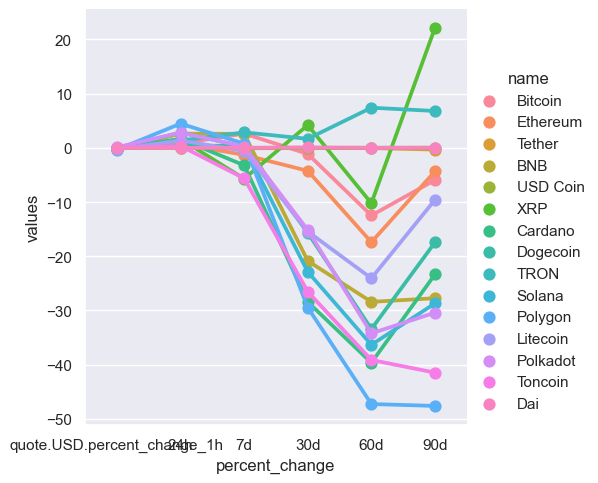

In [29]:
#Plot
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [30]:
#messy - alter df7 above

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Dogecoin'")
df10

,name,quote.USD.price,timestamp
7,Dogecoin,0.06231,2023-06-17 23:16:07.275212
7,Dogecoin,0.06231,NaT
7,Dogecoin,0.06231,NaT
7,Dogecoin,0.06231,NaT
7,Dogecoin,0.06229,NaT
7,Dogecoin,0.06229,NaT
